In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [13]:
df=pd.read_csv(r'Z:\AA_SEM9\Gold Price Prediction\Dataset\gold_monthly_csv.csv')
df

,Date,Price
0,1950-01,34.730
1,1950-02,34.730
2,1950-03,34.730
3,1950-04,34.730
4,1950-05,34.730
...,...,...
842,2020-03,1593.764
843,2020-04,1680.030
844,2020-05,1715.697
845,2020-06,1734.032


The date range of gold prices available is from 1950-01 to 2020-07

In [14]:
df.shape

(847, 2)

In [15]:
# Create a new dataframe with monthly date as index
date_range=pd.date_range(start='1/1/1950' ,end='8/1/2020', freq='M')
df['month']=date_range
df.drop('Date',axis=1 ,inplace=True)
df.head(2)

,Price,month
0,34.73,1950-01-31
1,34.73,1950-02-28


In [16]:
# Change the month as index
df=df.set_index('month')
df.head(2)

,Price
month,
1950-01-31,34.73
1950-02-28,34.73


<Figure size 2000x800 with 0 Axes>

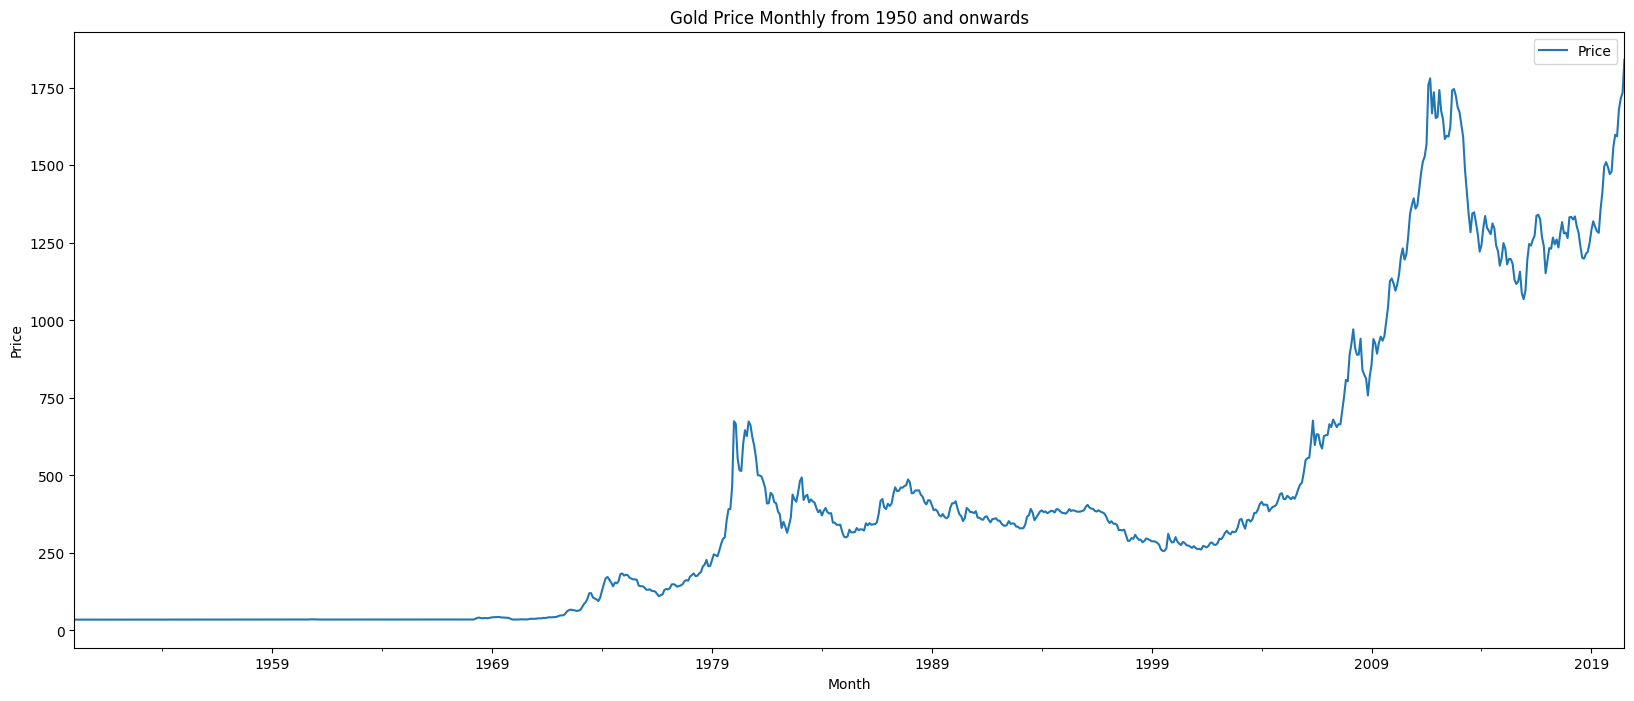

In [20]:
# Plot the gold prices over time
plt.figure(figsize=(20,8))
df.plot(figsize=(20,8))  # df.plot() is a Pandas function that is used to plot a DataFrame.
plt.title('Gold Price Monthly from 1950 and onwards')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

In [22]:
df.describe()

,Price
count,847.000000
mean,416.556906
std,453.665313
min,34.490000
25%,35.190000
50%,319.622000
75%,447.029000
max,1840.807000


In [23]:
from statsmodels.graphics.tsaplots import month_plot

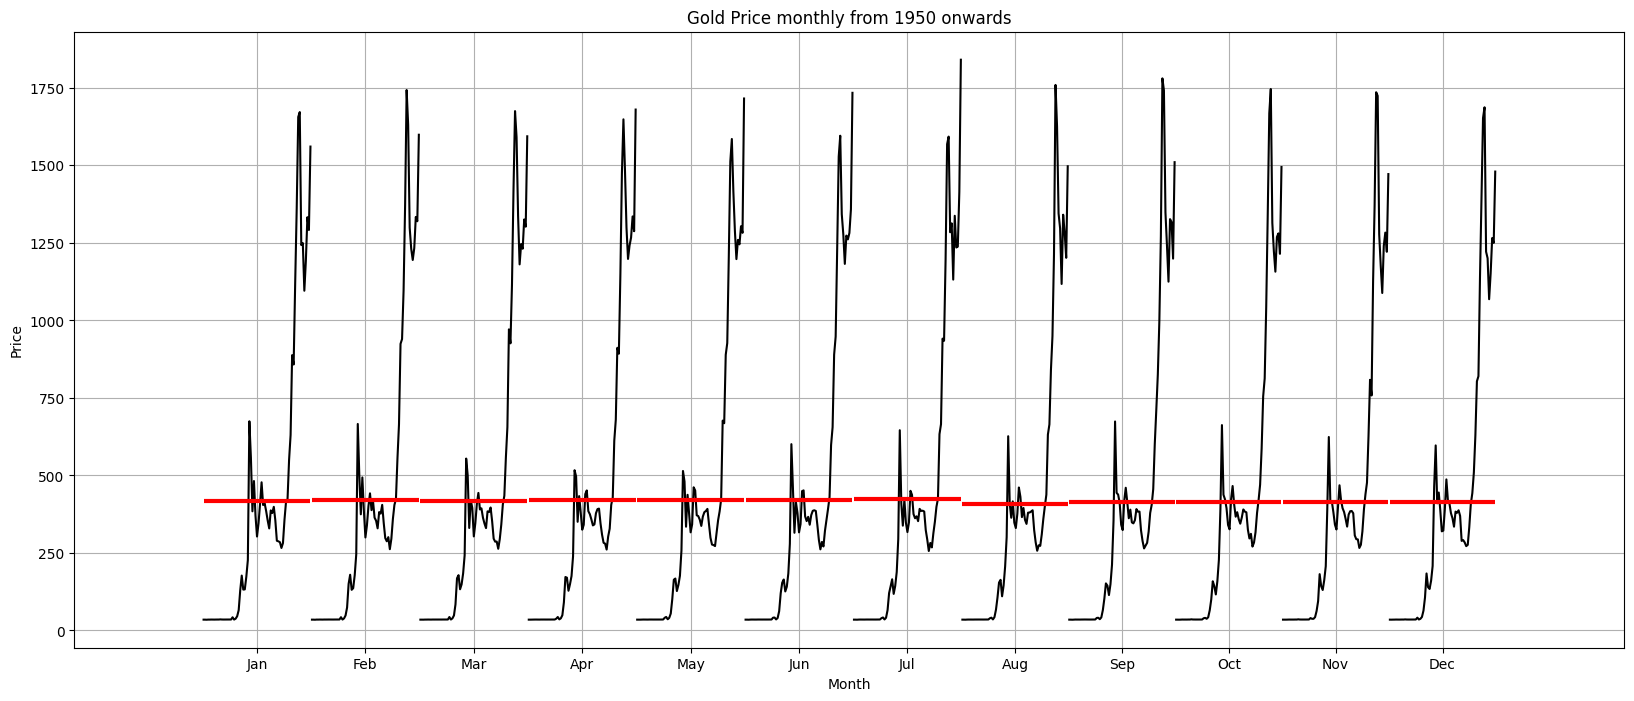

In [25]:
#Ploting the gold prices by month
fig,ax=plt.subplots(figsize=(20,8))
month_plot(df,ylabel='Gold Price',ax=ax)
plt.title('Gold Price monthly from 1950 onwards')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid()
plt.show()

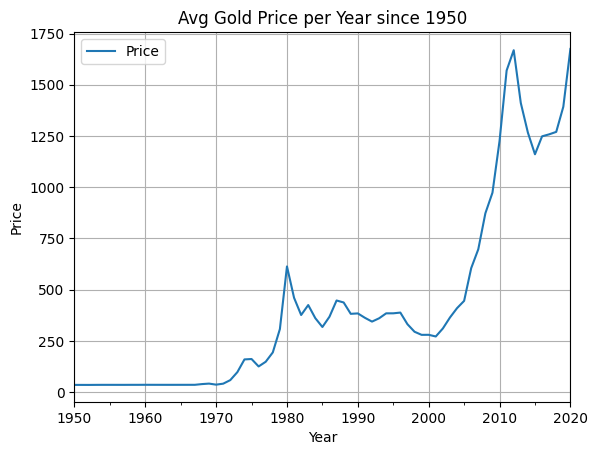

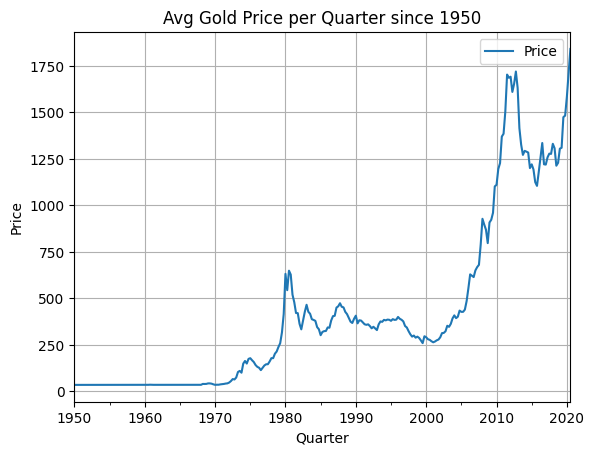

In [26]:
# Create yearly, quarterly, and decade summaries of the data
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot()
plt.title('Avg Gold Price per Year since 1950')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid()
df_quarterly_sum = df.resample('Q').mean()
df_quarterly_sum.plot()
plt.title('Avg Gold Price per Quarter since 1950')
plt.xlabel('Quarter')
plt.ylabel('Price')
plt.grid()